# importing Neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
data=pd.read_csv('/content/final_test.csv')


# Data Analysis

In [3]:
data.head(5)



,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
# data.corr()

In [6]:
data.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [7]:

data['size'].value_counts()

,count
size,
M,29712
S,21924
XXXL,21359
XL,19119
L,17587
XXS,9964
XXL,69


# performing visualization of the dataset

In [8]:
df = data

<Axes: xlabel='age'>

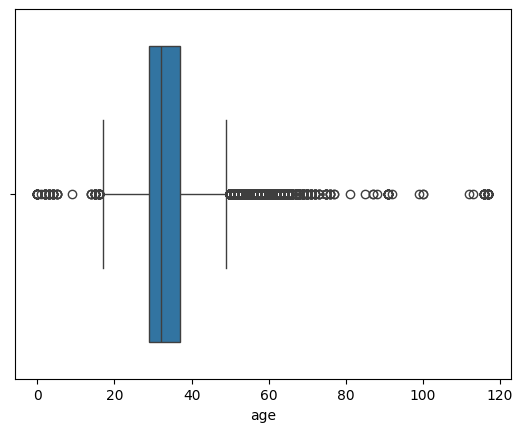

In [9]:
sns.boxplot(x = "age", data = df)

<Axes: xlabel='weight'>

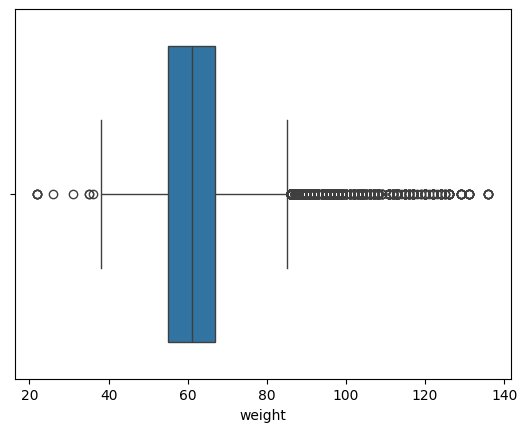

In [10]:
sns.boxplot(x = 'weight',data=data)

<Axes: xlabel='height'>

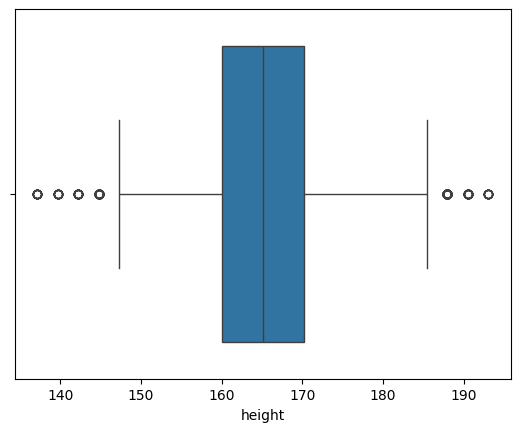

In [11]:
sns.boxplot(x = 'height',data=data)

# otliers removal

In [12]:
df = []
zscore_threshold = 3
for size_type in data['size'].unique():
    ndf = data[['age', 'height', 'weight']][data['size'] == size_type]
    zscore = np.abs((ndf - ndf.mean()) / ndf.std())
    ndf = ndf[(zscore < zscore_threshold).all(axis=1)]
    ndf['size'] = size_type
    df.append(ndf)
    df_cleaned = pd.concat(df)
data=df_cleaned
data.head()

,age,height,weight,size
0,28.0,172.72,62,XL
24,29.0,177.80,74,XL
25,32.0,160.02,64,XL
28,31.0,154.94,58,XL
34,36.0,162.56,68,XL


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['size']=le.fit_transform(data['size'])

In [14]:
le.classes_

array(['L', 'M', 'S', 'XL', 'XXL', 'XXS', 'XXXL'], dtype=object)

In [15]:
# plt.figure(figsize=(12,12))
# sns.heatmap(data.corr(),annot=True,cmap='terrain')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116487 entries, 0 to 117637
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   age     116487 non-null  float64
 1   height  116487 non-null  float64
 2   weight  116487 non-null  int64  
 3   size    116487 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 4.4 MB


In [17]:
data=data.dropna()
data['bmi'] = data['height']/data['weight']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116487 entries, 0 to 117637
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   age     116487 non-null  float64
 1   height  116487 non-null  float64
 2   weight  116487 non-null  int64  
 3   size    116487 non-null  int64  
 4   bmi     116487 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.3 MB


# data Splitting

In [19]:
x=data.drop('size',axis=1)
y=data['size']


In [20]:
x

,age,height,weight,bmi
0,28.0,172.72,62,2.785806
24,29.0,177.80,74,2.402703
25,32.0,160.02,64,2.500313
28,31.0,154.94,58,2.671379
34,36.0,162.56,68,2.390588
...,...,...,...,...
112707,24.0,149.86,68,2.203824
114732,30.0,160.02,74,2.162432
114803,32.0,160.02,69,2.319130
114994,46.0,160.02,64,2.500313


In [21]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)



In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [23]:
dt=DecisionTreeClassifier()
kFold=StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(dt, x_train, y_train, cv=kFold, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
print(classification_report(predictions,y_test))


Cross-validation scores: [0.60428128 0.60260977 0.60183389 0.60585435 0.60380885]
Mean accuracy: 0.6036776280636159
              precision    recall  f1-score   support

           0       0.47      0.45      0.46      9295
           1       0.44      0.43      0.44      9014
           2       0.46      0.47      0.46      8343
           3       0.47      0.50      0.48      8127
           4       0.98      0.99      0.99      8690
           5       0.73      0.68      0.70      9297
           6       0.73      0.79      0.76      7996

    accuracy                           0.61     60762
   macro avg       0.61      0.61      0.61     60762
weighted avg       0.61      0.61      0.61     60762



In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
rf=RandomForestClassifier(100)
kFold=StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(rf, x_train, y_train, cv=kFold, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean()}")
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print(classification_report(predictions,y_test))


Cross-validation scores: [0.60893638 0.61019221 0.60578381 0.61135602 0.60856992]
Mean accuracy: 0.6089676675268538
              precision    recall  f1-score   support

           0       0.45      0.45      0.45      8699
           1       0.44      0.43      0.43      8840
           2       0.46      0.47      0.47      8322
           3       0.47      0.50      0.48      8116
           4       0.99      0.99      0.99      8763
           5       0.75      0.68      0.71      9640
           6       0.75      0.78      0.76      8382

    accuracy                           0.62     60762
   macro avg       0.62      0.61      0.61     60762
weighted avg       0.62      0.62      0.62     60762



In [27]:
import pickle

# Assuming 'model' is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [28]:
import pickle
import gzip

# Assuming 'model' is your trained model
with gzip.open('model.pkl.gz', 'wb') as file:
    pickle.dump(rf, file)
